In [1]:
#initial import of relevant packages for graphing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [2]:
#read in the data
df = pd.read_csv("1-10-25_antagonist_as_antagonist_plate_all_drugs_data_for_plot.csv", index_col=0)  # Set the first column as row index

In [3]:
df

,OxA,Suvorexant,DMSO,Z133963954,Z2169713547,PV-002353454027,PV-006439055682,PV-002221910629,PV-006204130375,Z3914924625,...,PV-002738102521,PV-000555062637,PV-005932782926,PV-005143787306,PV-005191963626,PV-000574352410,PV-004632151949,Z3360656891,PV-005091654909,Z1738787391
Treatment,,,,,,,,,,,,,,,,,,,,,
Replicate 1,268160,7680,11360,87480,228960,209040,39280,307000,81160,213640,...,428840,427040,140160,361480,533440,178560,548080,184400,274400,228120
Replicate 2,194160,5640,10640,92440,214560,310360,102560,191360,63880,135920,...,190600,317280,140360,97080,119680,127120,284640,187000,191520,67040
Replicate 3,210480,3280,14520,90480,189000,182520,63280,86760,88680,158880,...,138080,178920,72400,133080,186080,295080,74280,112760,80120,147040
Replicate 4,192480,3560,12080,122120,201840,265520,160720,113480,129640,122400,...,206200,91720,113480,126520,166600,143120,109000,70160,82120,176520


In [4]:
#get mean and std dev
column_means = df.mean(axis=0)  # Mean of each column
column_stds = df.std(axis=0)    # Standard deviation of each column

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


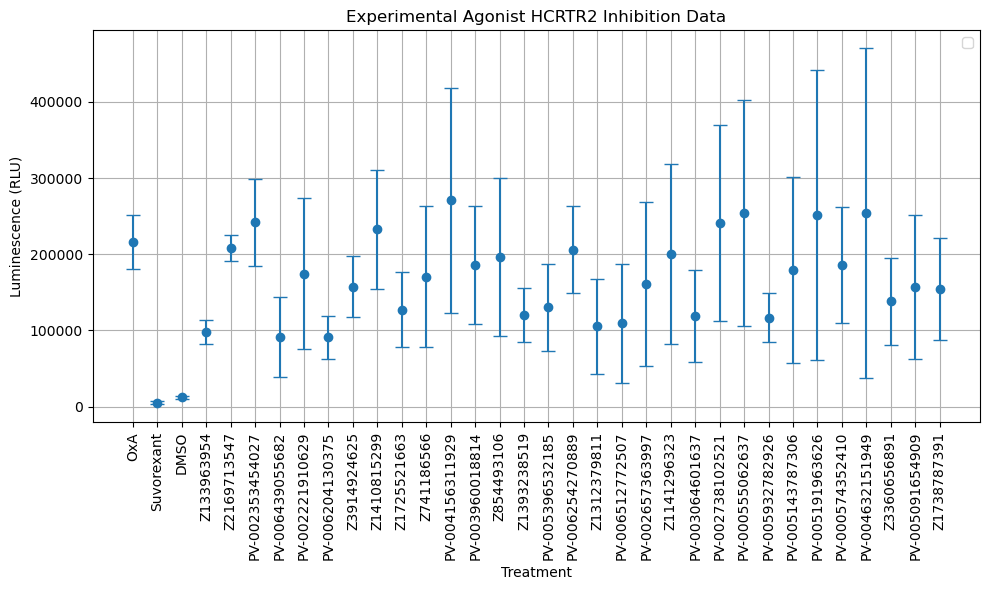

In [5]:
#make plot


plt.figure(figsize=(10, 6))
plt.errorbar(column_means.index, column_means, yerr=column_stds, fmt='o', capsize=5)

# Customizing the plot
plt.title('Experimental Agonist HCRTR2 Inhibition Data')
plt.xlabel('Treatment')
plt.ylabel('Luminescence (RLU)')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()